In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,mean_squared_error,mean_absolute_error

In [2]:
data = pd.read_csv("D:\\Downloads\\machine.data",sep=",")
data

,adviser,32/60,125,256,6000,256.1,16,128,198,199
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290
...,...,...,...,...,...,...,...,...,...,...
203,sperry,80/8,124,1000,8000,0,1,8,42,37
204,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
205,sratus,32,125,2000,8000,0,2,14,52,41
206,wang,vs-100,480,512,8000,32,0,0,67,47


In [3]:
data.shape

(208, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   adviser  208 non-null    object
 1   32/60    208 non-null    object
 2   125      208 non-null    int64 
 3   256      208 non-null    int64 
 4   6000     208 non-null    int64 
 5   256.1    208 non-null    int64 
 6   16       208 non-null    int64 
 7   128      208 non-null    int64 
 8   198      208 non-null    int64 
 9   199      208 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.4+ KB


In [5]:
col_names = ['vendorname','modelname','myct','mmin','mmax','cach','chmin','chmax','prp','erp']

In [6]:
data.columns=col_names

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   vendorname  208 non-null    object
 1   modelname   208 non-null    object
 2   myct        208 non-null    int64 
 3   mmin        208 non-null    int64 
 4   mmax        208 non-null    int64 
 5   cach        208 non-null    int64 
 6   chmin       208 non-null    int64 
 7   chmax       208 non-null    int64 
 8   prp         208 non-null    int64 
 9   erp         208 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.4+ KB


In [8]:
corr = data.corr()

<AxesSubplot:>

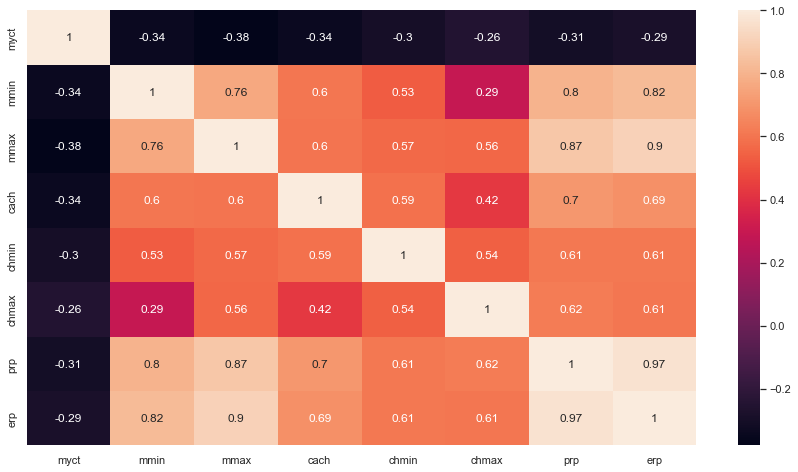

In [9]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr,annot=True)

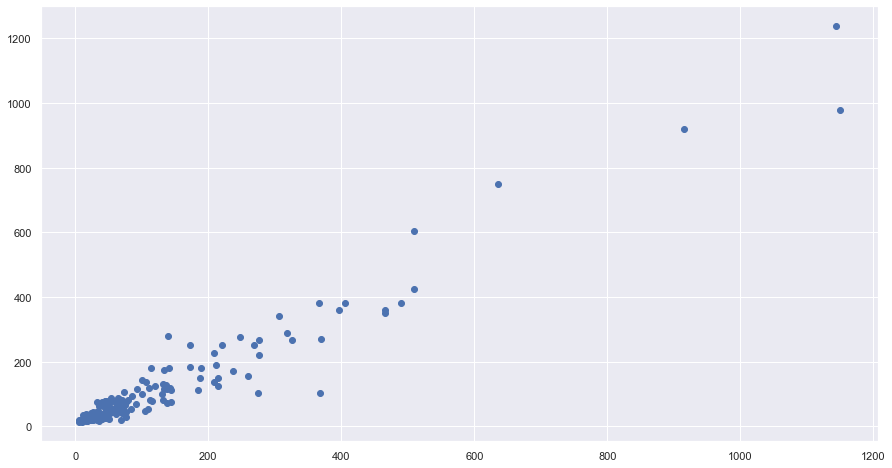

In [10]:
plt.scatter(data.prp,data.erp)

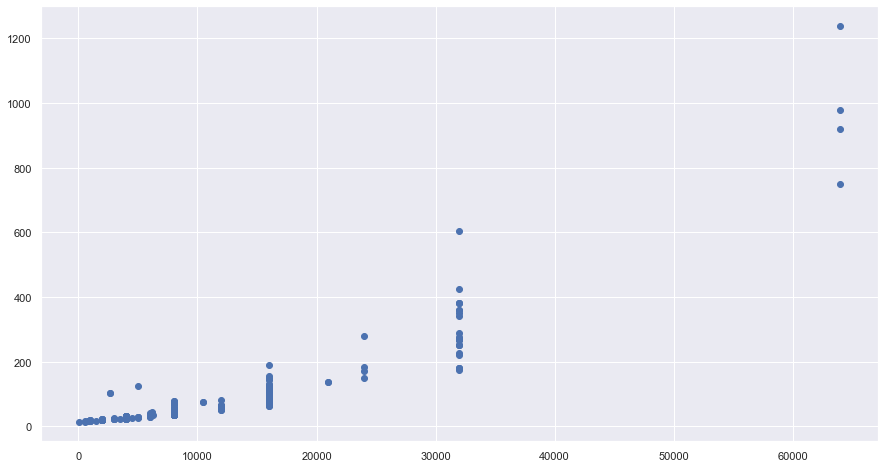

In [11]:
plt.scatter(data.mmax,data.erp)

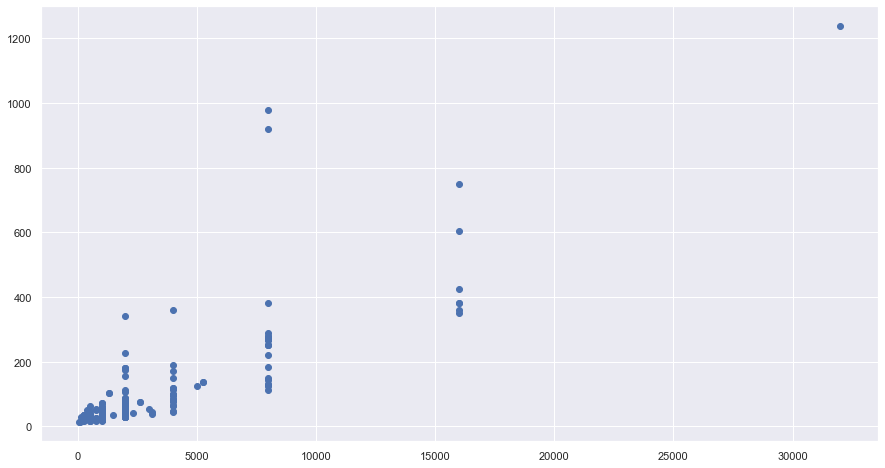

In [12]:
plt.scatter(data.mmin,data.erp)

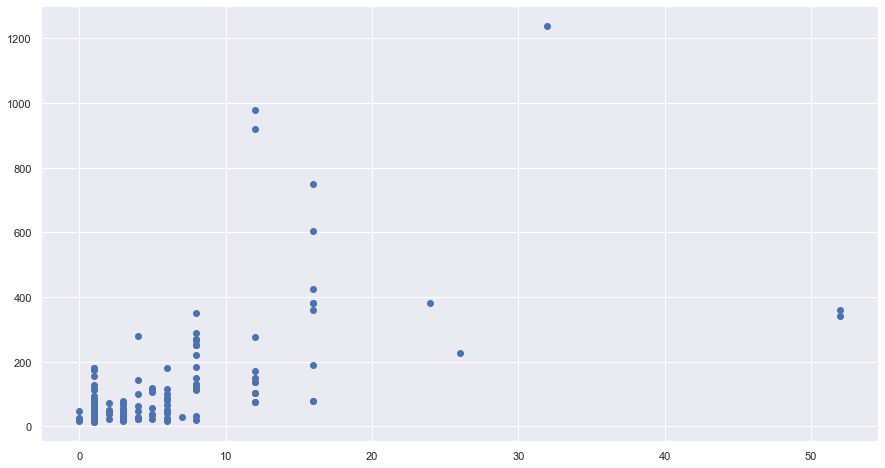

In [13]:
plt.scatter(data.chmin,data.erp)

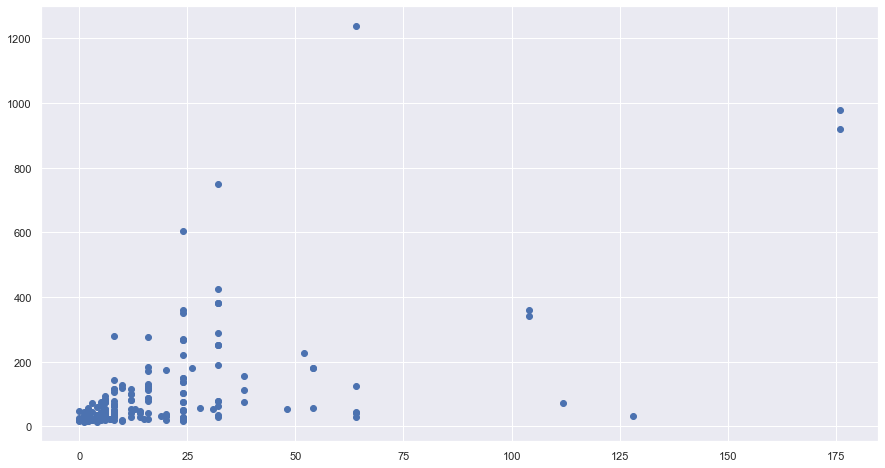

In [14]:
plt.scatter(data.chmax,data.erp)

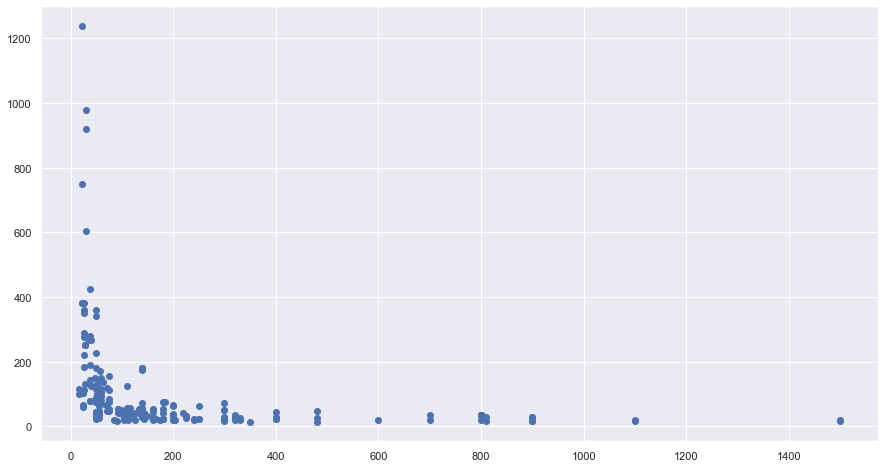

In [15]:
plt.scatter(data.myct,data.erp)

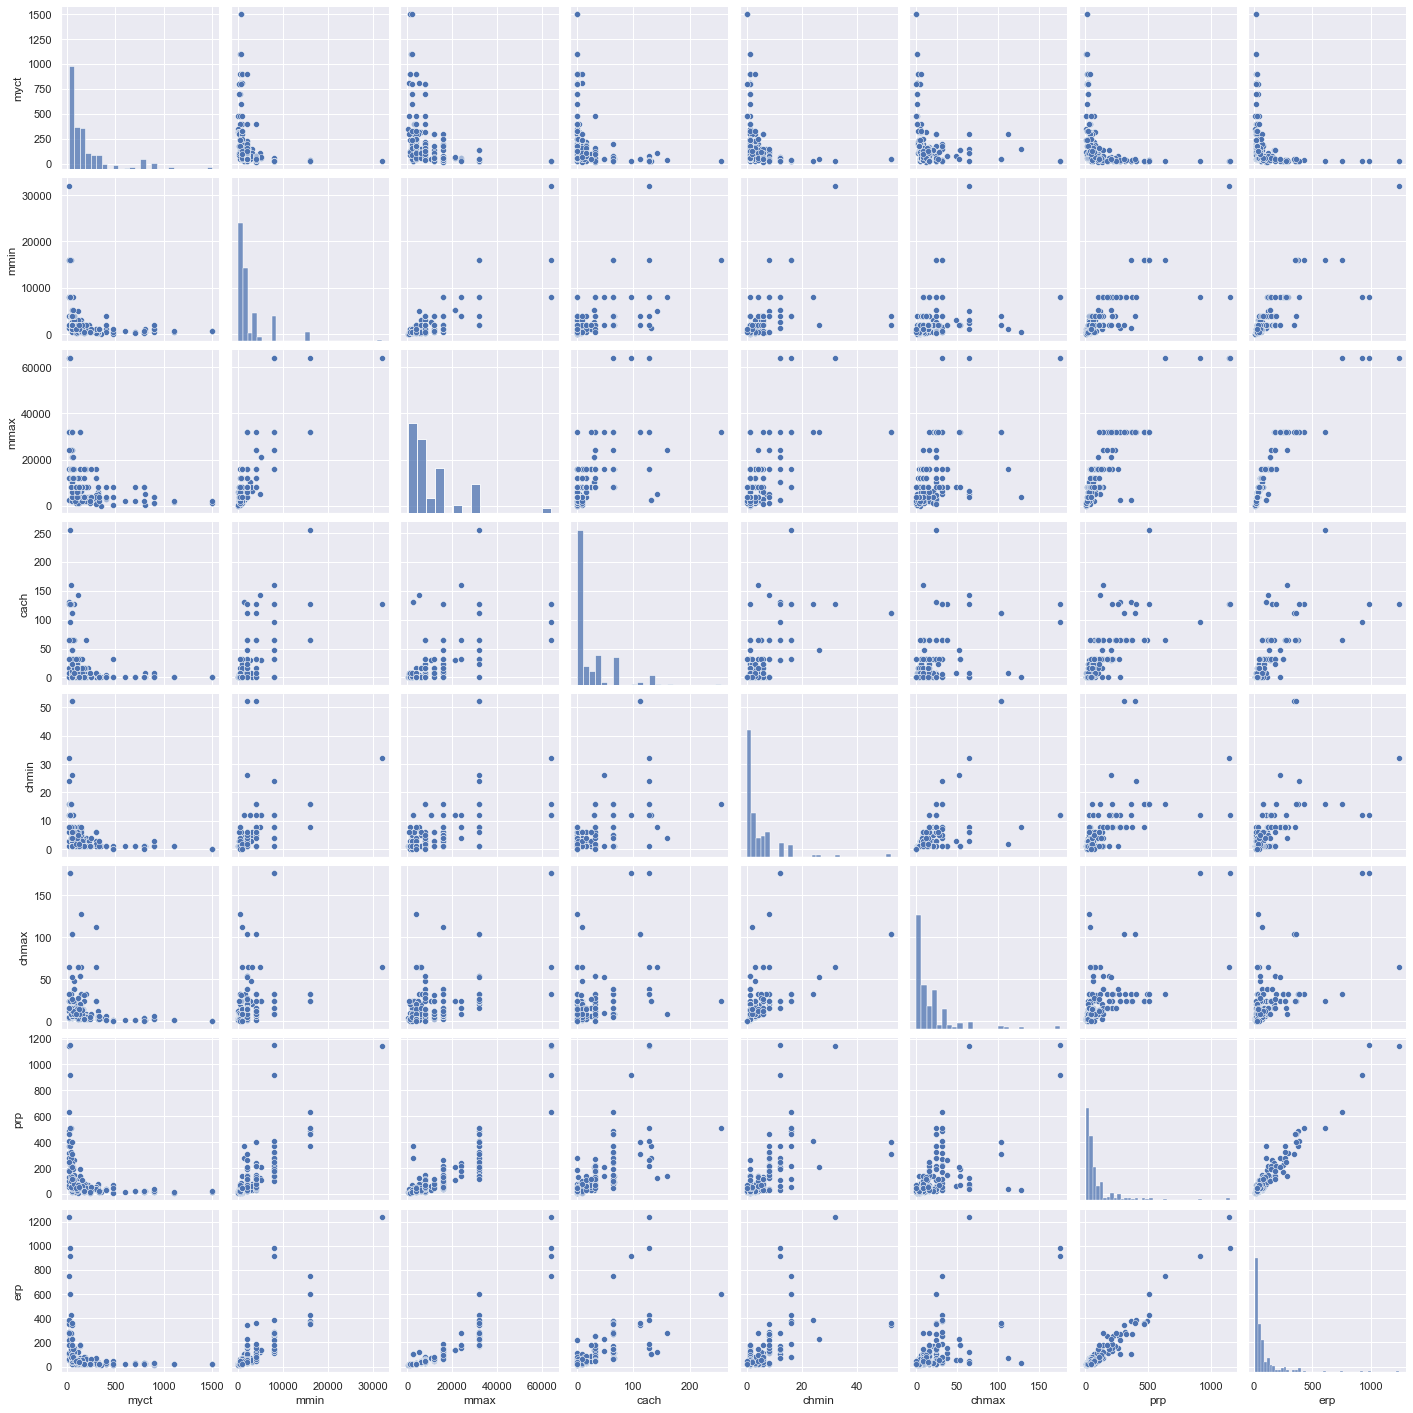

In [16]:
sns.pairplot(data)

In [17]:
data.vendorname.unique()

array(['amdahl', 'apollo', 'basf', 'bti', 'burroughs', 'c.r.d', 'cdc',
       'cambex', 'dec', 'dg', 'formation', 'four-phase', 'gould', 'hp',
       'harris', 'honeywell', 'ibm', 'ipl', 'magnuson', 'microdata',
       'nas', 'ncr', 'nixdorf', 'perkin-elmer', 'prime', 'siemens',
       'sperry', 'sratus', 'wang'], dtype=object)

In [18]:
data.modelname.unique()

array(['470v/7', '470v/7a', '470v/7b', '470v/7c', '470v/b', '580-5840',
       '580-5850', '580-5860', '580-5880', 'dn320', 'dn420', '7/65',
       '7/68', '5000', '8000', 'b1955', 'b2900', 'b2925', 'b4955',
       'b5900', 'b5920', 'b6900', 'b6925', '68/10-80', 'universe:2203t',
       'universe:68', 'universe:68/05', 'universe:68/137',
       'universe:68/37', 'cyber:170/750', 'cyber:170/760',
       'cyber:170/815', 'cyber:170/825', 'cyber:170/835', 'cyber:170/845',
       'omega:480-i', 'omega:480-ii', 'omega:480-iii', '1636-1',
       '1636-10', '1641-1', '1641-11', '1651-1', 'decsys:10:1091',
       'decsys:20:2060', 'microvax-1', 'vax:11/730', 'vax:11/750',
       'vax:11/780', 'eclipse:c/350', 'eclipse:m/600', 'eclipse:mv/10000',
       'eclipse:mv/4000', 'eclipse:mv/6000', 'eclipse:mv/8000',
       'eclipse:mv/8000-ii', 'f4000/100', 'f4000/200', 'f4000/200ap',
       'f4000/300', 'f4000/300ap', '2000/260', 'concept:32/8705',
       'concept:32/8750', 'concept:32/8780', '3000/3

In [19]:
y = data.pop('erp')

In [20]:
x = data.drop(['vendorname','modelname'],axis=1)

In [21]:
x.shape

(208, 7)

In [22]:
x.head()

,myct,mmin,mmax,cach,chmin,chmax,prp
0,29,8000,32000,32,8,32,269
1,29,8000,32000,32,8,32,220
2,29,8000,32000,32,8,32,172
3,29,8000,16000,32,8,16,132
4,26,8000,32000,64,8,32,318


In [23]:
x[['myct','mmin','mmax','cach','chmin','chmax','prp']]=StandardScaler().fit_transform(x[['myct','mmin','mmax','cach','chmin','chmax','prp']])

In [24]:
xtr,xts,ytr,yts=train_test_split(x,y,train_size=0.2)

In [25]:
regressor = SVR(kernel = 'rbf')
regressor.fit(xtr,ytr)

SVR()

In [26]:
pred = regressor.predict(xts)
mean_squared_error(pred,yts)

26168.886017038123